# Chicago

This notebooks displays some of the data available at [Business Licenses - Current Active](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q). We assume the data was downloaded.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Data

In [3]:
from pyensae.datasource import download_data
file = download_data("rows.csv", url="https://data.cityofchicago.org/api/views/uupf-x98q/")

## Businesses

In [4]:
import pandas
businesses = df = pandas.read_csv("rows.csv", low_memory=False)
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,2488345-20160830,2488345,409564,1,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",5722 S WOOD ST 1ST,CHICAGO,IL,60636,...,08/30/2016,09/15/2018,08/30/2016,08/30/2016,AAI,NaN,NaN,41.789617,-87.669472,"(41.78961679000226, -87.66947199630827)"
1,2354707-20160916,2482568,393149,1,ANGELINE R. MC CARTHY,ANGELINE R. MC CARTHY,17707 S HARLEM ST 1,TINLEY PARK,IL,60477,...,09/16/2016,09/15/2018,NaN,08/30/2016,AAI,NaN,NaN,NaN,NaN,NaN
2,2374115-20160916,2481313,352159,3,Genesys Works Chicago,Genesys Works Chicago,180 N WABASH AVE 6 600,CHICAGO,IL,60601,...,09/16/2016,09/15/2018,08/30/2016,08/30/2016,AAI,NaN,1.0,41.885354,-87.626413,"(41.885353703982936, -87.62641328540737)"
3,2488347-20160830,2488347,409567,1,ROSA I. MONTOYA,SOUL MIND BODYWORK,3035 N MILWAUKEE AVE 1,CHICAGO,IL,60618,...,08/30/2016,09/15/2018,08/30/2016,08/30/2016,AAI,NaN,NaN,41.936432,-87.719244,"(41.936432172755346, -87.71924410911548)"
4,2488343-20160830,2488343,409562,1,TRANSITIONAL DEVELOPMENT REALTY INC.,TRANSITIONAL DEVELOPMENT REALTY INC.,29 W 159TH ST,HARVEY,IL,60426,...,08/30/2016,09/15/2018,08/30/2016,08/30/2016,AAI,NaN,NaN,NaN,NaN,NaN


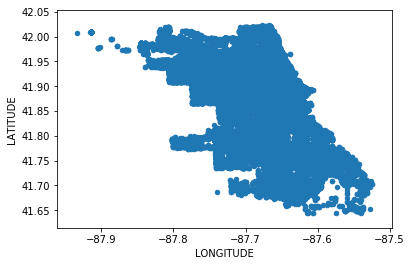

In [5]:
df.plot(x="LONGITUDE", y="LATITUDE", kind="scatter");

In [6]:
minlon, maxlon = df["LONGITUDE"].min(), df["LONGITUDE"].max()
minlat, maxlat = df["LATITUDE"].min(), df["LATITUDE"].max()
minlon, maxlon, minlat, maxlat

(-87.933976504, -87.525094136, 41.644670131999995, 42.022660268)

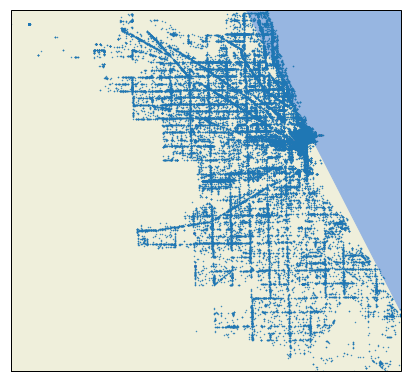

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minlon, maxlon, minlat, maxlat])
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.plot(df["LONGITUDE"], df["LATITUDE"], '.', ms=0.9);